In [153]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [154]:
#cargar archivo desde seaborn 
df=pd.read_csv('Mexico_limpio.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/35797,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,Dici,2010-06-28,a few days or more,0%,f,...,5.00,5.00,5.00,4.80,4.70,1.0,1.0,0.0,0.0,1.70
1,https://www.airbnb.com/rooms/44616,Condesa Haus,A new concept of hosting in mexico through a b...,No se proporcionan detalles,https://a0.muscache.com/pictures/251410/ec75fe...,Fernando,2010-08-09,within an hour,100%,t,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.41
2,https://www.airbnb.com/rooms/67703,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",No se proporcionan detalles,https://a0.muscache.com/pictures/3281720/6f078...,Nicholas,2011-01-04,within an hour,71%,t,...,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0,0.31
3,https://www.airbnb.com/rooms/70644,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,Trisha,2010-08-24,within a few hours,100%,t,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.83
4,https://www.airbnb.com/rooms/107078,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,Andrea,2011-04-27,within an hour,100%,t,...,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0,0.11


In [155]:
f1=df.iloc[ :  , [8,9,10,13,14,20,24,25,28,40] ]
f1

,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,0%,f,t,Entire villa,Entire home/apt,f,2.0,1.0,1093.1,5.00
1,100%,t,t,Entire home,Entire home/apt,f,2.9,1.0,1511.6,4.70
2,71%,t,t,Entire rental unit,Entire home/apt,f,4.0,1.0,2029.0,4.75
3,100%,t,t,Entire rental unit,Entire home/apt,f,2.0,1.0,1140.0,4.96
4,100%,t,t,Entire loft,Entire home/apt,f,2.0,1.5,1093.1,5.00
...,...,...,...,...,...,...,...,...,...,...
26577,100%,t,t,Private room in guesthouse,Private room,t,4.0,1.0,488.0,5.00
26578,100%,f,t,Room in hotel,Private room,t,2.0,1.0,1093.1,5.00
26579,100%,f,t,Room in hotel,Private room,t,2.0,1.0,2700.0,5.00
26580,100%,f,t,Room in hotel,Private room,t,2.0,1.0,2600.0,5.00


In [156]:
#convertimos string a tipos numéricos
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#f1['property_type'] = encoder.fit_transform(f1['property_type'])
#f1['property_type'] = f1['property_type'].astype(float)

frecuencias = f1['property_type'].value_counts()
f1['property_type'] = f1['property_type'].map(frecuencias)


f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

f1['price'] = f1['price'].astype(str).str.rstrip('$')
f1['price'] = pd.to_numeric(f1['price'], errors='coerce').fillna(0)

C:\Users\josse\AppData\Local\Temp\ipykernel_16124\1986825469.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\josse\AppData\Local\Temp\ipykernel_16124\1986825469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\josse\AppData\Local\Temp\ipykernel_16124\1986825469.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remo

In [157]:
f1

,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,0.0,0,1,13,1,0,2.0,1.0,1093.1,5.00
1,100.0,1,1,817,1,0,2.9,1.0,1511.6,4.70
2,71.0,1,1,9971,1,0,4.0,1.0,2029.0,4.75
3,100.0,1,1,9971,1,0,2.0,1.0,1140.0,4.96
4,100.0,1,1,1515,1,0,2.0,1.5,1093.1,5.00
...,...,...,...,...,...,...,...,...,...,...
26577,100.0,1,1,381,2,1,4.0,1.0,488.0,5.00
26578,100.0,0,1,504,2,1,2.0,1.0,1093.1,5.00
26579,100.0,0,1,504,2,1,2.0,1.0,2700.0,5.00
26580,100.0,0,1,504,2,1,2.0,1.0,2600.0,5.00


In [158]:
#f2 = Entire home/apt
f2= f1[(f1["room_type"] == 1)]


In [159]:
f2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17363 entries, 0 to 26581
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         17363 non-null  float64
 1   host_is_superhost          17363 non-null  int64  
 2   host_identity_verified     17363 non-null  int64  
 3   property_type              17363 non-null  int64  
 4   room_type                  17363 non-null  int64  
 5   instant_bookable           17363 non-null  int64  
 6   accommodates               17363 non-null  float64
 7   bathrooms                  17363 non-null  float64
 8   price                      17363 non-null  float64
 9   review_scores_cleanliness  17363 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.5 MB


<Axes: xlabel='room_type', ylabel='price'>

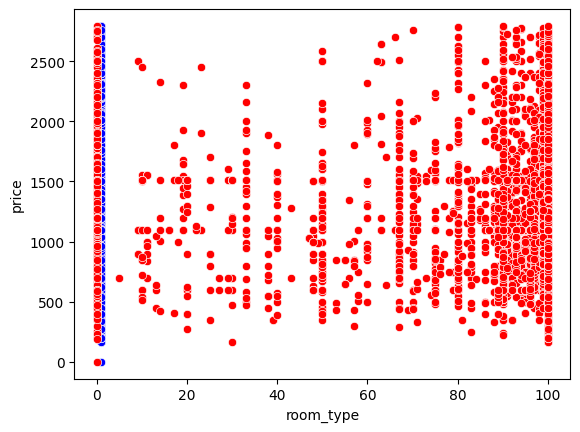

In [160]:
#imprimimos el scatter plot entre la variable dependiente total e independiente (a)
#para observar el comportamiento en su dispersión 

from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

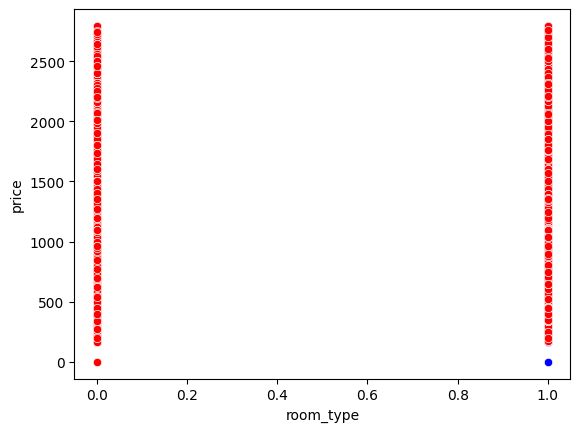

In [161]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

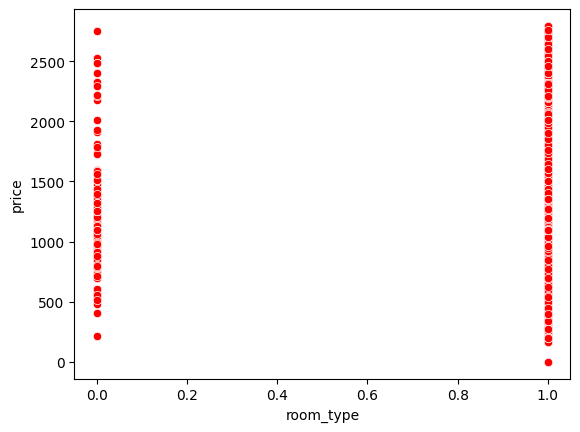

In [162]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

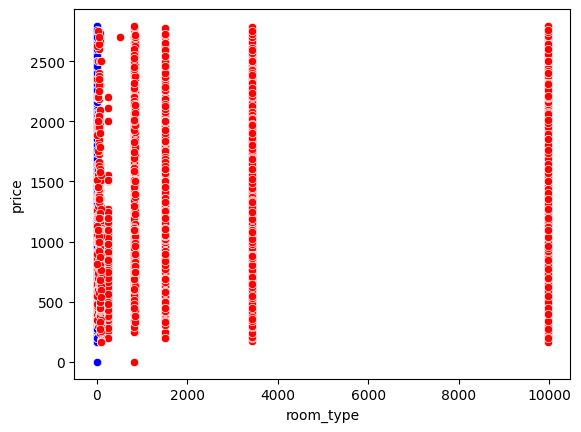

In [163]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

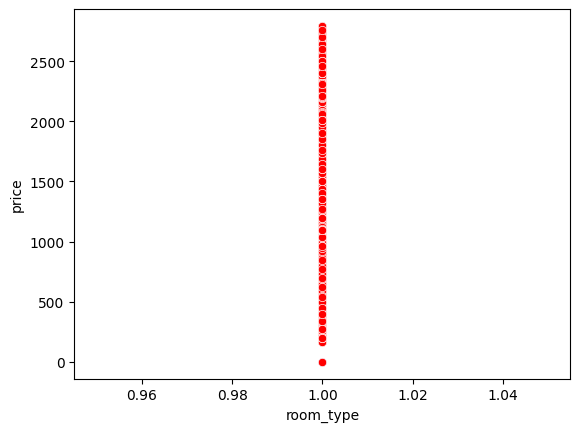

In [164]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

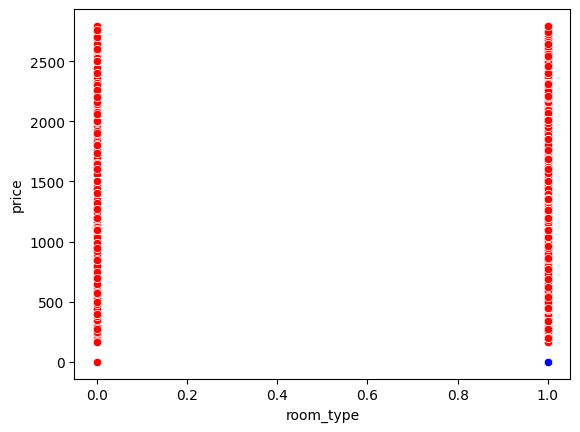

In [165]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

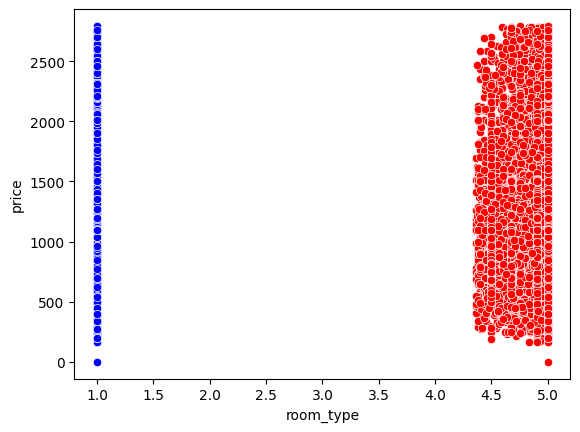

In [166]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='accommodates'>

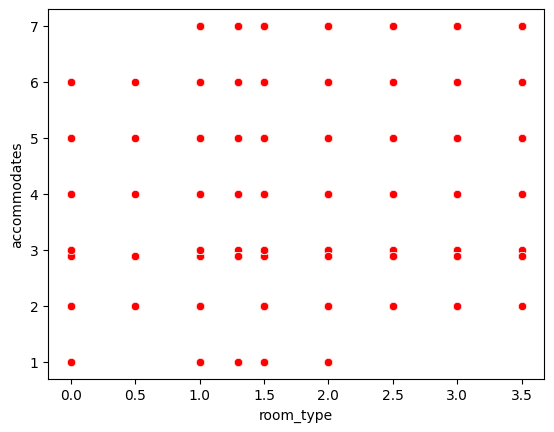

In [167]:
from turtle import color 

sns.scatterplot(x='room_type', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='accommodates', color='red', data=f2)

**DECLARACIÓN DE VARIABLES INDEPENDIENTES Y DEPENDIENTES**

In [168]:
#declaración de las variables independientes que se van a comparar con el precio 
Var_Indep= f2[['host_response_rate']]
Var_Indep2=f2[['host_is_superhost']]
Var_Indep3=f2[['room_type']]
Var_Indep4=f2[['host_identity_verified']]
Var_Indep5= f2[['property_type']]
Var_Indep6= f2[['instant_bookable']]
Var_Indep7= f2[['review_scores_cleanliness']]
#declaración de variable independiente para accommodates 
Var_Indep8= f2[['bathrooms']]

In [169]:
#variables independientes para la regresión lineal
Var_Dep= f2['price']
Var_Dep2= f2['accommodates']

**DEFINICIÓN DEL MODELO**

In [170]:
#se define model como función de regresión lineal 
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model2=LinearRegression()
model3=LinearRegression()
model4=LinearRegression()
model5=LinearRegression()
model6=LinearRegression()
model7=LinearRegression()
model8=LinearRegression()

In [171]:
#verficamos la función relacionada al modelo 
type(model)
type(model2)
type(model3)
type(model4)
type(model5)
type(model6)
type(model7)
type(model8)

sklearn.linear_model._base.LinearRegression

In [172]:
#ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep, y=Var_Dep)
model2.fit(X=Var_Indep2, y=Var_Dep)
model3.fit(X=Var_Indep3, y=Var_Dep)
model4.fit(X=Var_Indep4, y=Var_Dep)
model5.fit(X=Var_Indep5, y=Var_Dep)
model6.fit(X=Var_Indep6, y=Var_Dep)
model7.fit(X=Var_Indep7, y=Var_Dep)
model8.fit(X=Var_Indep8, y=Var_Dep2)

LinearRegression()

**COEFICIENTES OBTENIDOS PARA NUESTROS MODELOS**

In [173]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.94114872]),
 'rank_': 1,
 'singular_': array([4382.94536198]),
 'intercept_': np.float64(1327.7330443080114)}

In [174]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([21.00986237]),
 'rank_': 1,
 'singular_': array([65.53449846]),
 'intercept_': np.float64(1237.7516553524804)}

In [175]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(1247.1754189944133)}

In [176]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-112.80942578]),
 'rank_': 1,
 'singular_': array([20.54754994]),
 'intercept_': np.float64(1357.171593533486)}

In [177]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.01297001]),
 'rank_': 1,
 'singular_': array([525028.82206925]),
 'intercept_': np.float64(1161.3422269732644)}

In [178]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([71.48464608]),
 'rank_': 1,
 'singular_': array([65.05823086]),
 'intercept_': np.float64(1217.0755372065255)}

In [179]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([381.28956491]),
 'rank_': 1,
 'singular_': array([19.28068787]),
 'intercept_': np.float64(-604.4218714343112)}

In [180]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.97488088]),
 'rank_': 1,
 'singular_': array([78.15957308]),
 'intercept_': np.float64(2.1063441944025767)}

**A PARTIR DE AQUÍ PREDECIMOS VALORES DE ACUERDO AL MODELO MATEMÁTICO**

**Modelo matemático y=-0.94114872x + 1327.7330443080114**

In [181]:
#predecimos valores
y_pred= model.predict(X=f2[['host_response_rate']])
y_pred

array([1327.73304431, 1233.61817253, 1260.91148534, ..., 1327.73304431,
       1233.61817253, 1233.61817253], shape=(17363,))

**Modelo matemático y=21.00986237x + 1237.7516553524084**

In [182]:
#predecimos valores
y_pred2= model2.predict(X=f2[['host_is_superhost']])
y_pred2

array([1237.75165535, 1258.76151772, 1258.76151772, ..., 1237.75165535,
       1237.75165535, 1258.76151772], shape=(17363,))

**Modelo matemático y=0x + 11247.1754189944133**

In [183]:
#predecimos valores
y_pred3= model3.predict(X=f2[['room_type']])
y_pred3

array([1247.17541899, 1247.17541899, 1247.17541899, ..., 1247.17541899,
       1247.17541899, 1247.17541899], shape=(17363,))

**Modelo matemático y=-112.80942578x + 1357.171593533486**

In [184]:
#predecimos valores
y_pred4= model4.predict(X=f2[['host_identity_verified']])
y_pred4

array([1244.36216775, 1244.36216775, 1244.36216775, ..., 1244.36216775,
       1244.36216775, 1244.36216775], shape=(17363,))

**Modelo matemático y=-4.56100445x + 1325.0492572068565**

In [185]:
#predecimos valores
y_pred5= model5.predict(X=f2[['property_type']])
y_pred5

array([1161.51083716, 1171.93872876, 1290.66624086, ..., 1290.66624086,
       1290.66624086, 1290.66624086], shape=(17363,))

**Modelo matemático y=71.48464608x + 1217.0755372065255**

In [186]:
#predecimos valores
y_pred6= model6.predict(X=f2[['instant_bookable']])
y_pred6

array([1217.07553721, 1217.07553721, 1217.07553721, ..., 1217.07553721,
       1288.56018329, 1288.56018329], shape=(17363,))

**Modelo matemático y=381.28956491x + -604.4218714343112**

In [187]:
y_pred7= model7.predict(X=f2[['review_scores_cleanliness']])
y_pred7

array([1302.0259531 , 1187.63908363, 1206.70356187, ..., 1302.0259531 ,
       1302.0259531 , 1302.0259531 ], shape=(17363,))

**Modelo matemático y=0.97488088x + 2.1063441944025767**

In [188]:
y_pred8= model8.predict(X=f2[['bathrooms']])
y_pred8

array([3.08122508, 3.08122508, 3.08122508, ..., 3.08122508, 3.08122508,
       3.08122508], shape=(17363,))

**INSERTAMOS LA COLUMNA DE PREDICCIONES A NUESTRO DATAFRAME**

In [189]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(0, 'Prediccion_host_response_rate', y_pred)
f2

,Prediccion_host_response_rate,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,1327.733044,0.0,0,1,13,1,0,2.0,1.0,1093.1,5.00
1,1233.618173,100.0,1,1,817,1,0,2.9,1.0,1511.6,4.70
2,1260.911485,71.0,1,1,9971,1,0,4.0,1.0,2029.0,4.75
3,1233.618173,100.0,1,1,9971,1,0,2.0,1.0,1140.0,4.96
4,1233.618173,100.0,1,1,1515,1,0,2.0,1.5,1093.1,5.00
...,...,...,...,...,...,...,...,...,...,...,...
26572,1327.733044,0.0,0,1,9971,1,0,4.0,1.0,700.0,5.00
26573,1327.733044,0.0,0,1,3423,1,0,4.0,2.0,1900.0,5.00
26574,1327.733044,0.0,0,1,9971,1,0,2.0,1.0,1200.0,5.00
26575,1233.618173,100.0,0,1,9971,1,1,3.0,1.0,1358.0,5.00


In [190]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(1, 'Prediccion_host_is_superhost', y_pred2)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,1327.733044,1237.751655,0.0,0,1,13,1,0,2.0,1.0,1093.1,5.00
1,1233.618173,1258.761518,100.0,1,1,817,1,0,2.9,1.0,1511.6,4.70
2,1260.911485,1258.761518,71.0,1,1,9971,1,0,4.0,1.0,2029.0,4.75
3,1233.618173,1258.761518,100.0,1,1,9971,1,0,2.0,1.0,1140.0,4.96
4,1233.618173,1258.761518,100.0,1,1,1515,1,0,2.0,1.5,1093.1,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...
26572,1327.733044,1237.751655,0.0,0,1,9971,1,0,4.0,1.0,700.0,5.00
26573,1327.733044,1237.751655,0.0,0,1,3423,1,0,4.0,2.0,1900.0,5.00
26574,1327.733044,1237.751655,0.0,0,1,9971,1,0,2.0,1.0,1200.0,5.00
26575,1233.618173,1237.751655,100.0,0,1,9971,1,1,3.0,1.0,1358.0,5.00


In [191]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(2, 'Prediccion_room_type', y_pred3)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,1327.733044,1237.751655,1247.175419,0.0,0,1,13,1,0,2.0,1.0,1093.1,5.00
1,1233.618173,1258.761518,1247.175419,100.0,1,1,817,1,0,2.9,1.0,1511.6,4.70
2,1260.911485,1258.761518,1247.175419,71.0,1,1,9971,1,0,4.0,1.0,2029.0,4.75
3,1233.618173,1258.761518,1247.175419,100.0,1,1,9971,1,0,2.0,1.0,1140.0,4.96
4,1233.618173,1258.761518,1247.175419,100.0,1,1,1515,1,0,2.0,1.5,1093.1,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26572,1327.733044,1237.751655,1247.175419,0.0,0,1,9971,1,0,4.0,1.0,700.0,5.00
26573,1327.733044,1237.751655,1247.175419,0.0,0,1,3423,1,0,4.0,2.0,1900.0,5.00
26574,1327.733044,1237.751655,1247.175419,0.0,0,1,9971,1,0,2.0,1.0,1200.0,5.00
26575,1233.618173,1237.751655,1247.175419,100.0,0,1,9971,1,1,3.0,1.0,1358.0,5.00


In [192]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(3, 'Prediccion_host_identity_verified', y_pred4)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,1327.733044,1237.751655,1247.175419,1244.362168,0.0,0,1,13,1,0,2.0,1.0,1093.1,5.00
1,1233.618173,1258.761518,1247.175419,1244.362168,100.0,1,1,817,1,0,2.9,1.0,1511.6,4.70
2,1260.911485,1258.761518,1247.175419,1244.362168,71.0,1,1,9971,1,0,4.0,1.0,2029.0,4.75
3,1233.618173,1258.761518,1247.175419,1244.362168,100.0,1,1,9971,1,0,2.0,1.0,1140.0,4.96
4,1233.618173,1258.761518,1247.175419,1244.362168,100.0,1,1,1515,1,0,2.0,1.5,1093.1,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26572,1327.733044,1237.751655,1247.175419,1244.362168,0.0,0,1,9971,1,0,4.0,1.0,700.0,5.00
26573,1327.733044,1237.751655,1247.175419,1244.362168,0.0,0,1,3423,1,0,4.0,2.0,1900.0,5.00
26574,1327.733044,1237.751655,1247.175419,1244.362168,0.0,0,1,9971,1,0,2.0,1.0,1200.0,5.00
26575,1233.618173,1237.751655,1247.175419,1244.362168,100.0,0,1,9971,1,1,3.0,1.0,1358.0,5.00


In [193]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(4, 'Prediccion_property_type', y_pred5)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,1327.733044,1237.751655,1247.175419,1244.362168,1161.510837,0.0,0,1,13,1,0,2.0,1.0,1093.1,5.00
1,1233.618173,1258.761518,1247.175419,1244.362168,1171.938729,100.0,1,1,817,1,0,2.9,1.0,1511.6,4.70
2,1260.911485,1258.761518,1247.175419,1244.362168,1290.666241,71.0,1,1,9971,1,0,4.0,1.0,2029.0,4.75
3,1233.618173,1258.761518,1247.175419,1244.362168,1290.666241,100.0,1,1,9971,1,0,2.0,1.0,1140.0,4.96
4,1233.618173,1258.761518,1247.175419,1244.362168,1180.991799,100.0,1,1,1515,1,0,2.0,1.5,1093.1,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26572,1327.733044,1237.751655,1247.175419,1244.362168,1290.666241,0.0,0,1,9971,1,0,4.0,1.0,700.0,5.00
26573,1327.733044,1237.751655,1247.175419,1244.362168,1205.738586,0.0,0,1,3423,1,0,4.0,2.0,1900.0,5.00
26574,1327.733044,1237.751655,1247.175419,1244.362168,1290.666241,0.0,0,1,9971,1,0,2.0,1.0,1200.0,5.00
26575,1233.618173,1237.751655,1247.175419,1244.362168,1290.666241,100.0,0,1,9971,1,1,3.0,1.0,1358.0,5.00


In [194]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(5, 'Prediccion_instant_bookable', y_pred6)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,1327.733044,1237.751655,1247.175419,1244.362168,1161.510837,1217.075537,0.0,0,1,13,1,0,2.0,1.0,1093.1,5.00
1,1233.618173,1258.761518,1247.175419,1244.362168,1171.938729,1217.075537,100.0,1,1,817,1,0,2.9,1.0,1511.6,4.70
2,1260.911485,1258.761518,1247.175419,1244.362168,1290.666241,1217.075537,71.0,1,1,9971,1,0,4.0,1.0,2029.0,4.75
3,1233.618173,1258.761518,1247.175419,1244.362168,1290.666241,1217.075537,100.0,1,1,9971,1,0,2.0,1.0,1140.0,4.96
4,1233.618173,1258.761518,1247.175419,1244.362168,1180.991799,1217.075537,100.0,1,1,1515,1,0,2.0,1.5,1093.1,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26572,1327.733044,1237.751655,1247.175419,1244.362168,1290.666241,1217.075537,0.0,0,1,9971,1,0,4.0,1.0,700.0,5.00
26573,1327.733044,1237.751655,1247.175419,1244.362168,1205.738586,1217.075537,0.0,0,1,3423,1,0,4.0,2.0,1900.0,5.00
26574,1327.733044,1237.751655,1247.175419,1244.362168,1290.666241,1217.075537,0.0,0,1,9971,1,0,2.0,1.0,1200.0,5.00
26575,1233.618173,1237.751655,1247.175419,1244.362168,1290.666241,1288.560183,100.0,0,1,9971,1,1,3.0,1.0,1358.0,5.00


In [195]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(6, 'Prediccion_review_scores_cleanliness', y_pred7)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,1327.733044,1237.751655,1247.175419,1244.362168,1161.510837,1217.075537,1302.025953,0.0,0,1,13,1,0,2.0,1.0,1093.1,5.00
1,1233.618173,1258.761518,1247.175419,1244.362168,1171.938729,1217.075537,1187.639084,100.0,1,1,817,1,0,2.9,1.0,1511.6,4.70
2,1260.911485,1258.761518,1247.175419,1244.362168,1290.666241,1217.075537,1206.703562,71.0,1,1,9971,1,0,4.0,1.0,2029.0,4.75
3,1233.618173,1258.761518,1247.175419,1244.362168,1290.666241,1217.075537,1286.774371,100.0,1,1,9971,1,0,2.0,1.0,1140.0,4.96
4,1233.618173,1258.761518,1247.175419,1244.362168,1180.991799,1217.075537,1302.025953,100.0,1,1,1515,1,0,2.0,1.5,1093.1,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26572,1327.733044,1237.751655,1247.175419,1244.362168,1290.666241,1217.075537,1302.025953,0.0,0,1,9971,1,0,4.0,1.0,700.0,5.00
26573,1327.733044,1237.751655,1247.175419,1244.362168,1205.738586,1217.075537,1302.025953,0.0,0,1,3423,1,0,4.0,2.0,1900.0,5.00
26574,1327.733044,1237.751655,1247.175419,1244.362168,1290.666241,1217.075537,1302.025953,0.0,0,1,9971,1,0,2.0,1.0,1200.0,5.00
26575,1233.618173,1237.751655,1247.175419,1244.362168,1290.666241,1288.560183,1302.025953,100.0,0,1,9971,1,1,3.0,1.0,1358.0,5.00


In [196]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(7, 'Prediccion_bathrooms', y_pred8)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,1327.733044,1237.751655,1247.175419,1244.362168,1161.510837,1217.075537,1302.025953,3.081225,0.0,0,1,13,1,0,2.0,1.0,1093.1,5.00
1,1233.618173,1258.761518,1247.175419,1244.362168,1171.938729,1217.075537,1187.639084,3.081225,100.0,1,1,817,1,0,2.9,1.0,1511.6,4.70
2,1260.911485,1258.761518,1247.175419,1244.362168,1290.666241,1217.075537,1206.703562,3.081225,71.0,1,1,9971,1,0,4.0,1.0,2029.0,4.75
3,1233.618173,1258.761518,1247.175419,1244.362168,1290.666241,1217.075537,1286.774371,3.081225,100.0,1,1,9971,1,0,2.0,1.0,1140.0,4.96
4,1233.618173,1258.761518,1247.175419,1244.362168,1180.991799,1217.075537,1302.025953,3.568666,100.0,1,1,1515,1,0,2.0,1.5,1093.1,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26572,1327.733044,1237.751655,1247.175419,1244.362168,1290.666241,1217.075537,1302.025953,3.081225,0.0,0,1,9971,1,0,4.0,1.0,700.0,5.00
26573,1327.733044,1237.751655,1247.175419,1244.362168,1205.738586,1217.075537,1302.025953,4.056106,0.0,0,1,3423,1,0,4.0,2.0,1900.0,5.00
26574,1327.733044,1237.751655,1247.175419,1244.362168,1290.666241,1217.075537,1302.025953,3.081225,0.0,0,1,9971,1,0,2.0,1.0,1200.0,5.00
26575,1233.618173,1237.751655,1247.175419,1244.362168,1290.666241,1288.560183,1302.025953,3.081225,100.0,0,1,9971,1,1,3.0,1.0,1358.0,5.00


**GRÁFICAS COMPARATIVAS**

<Axes: xlabel='host_response_rate', ylabel='price'>

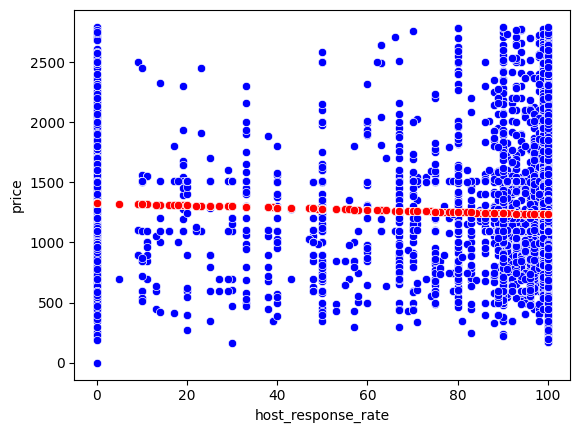

In [197]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_response_rate', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='Prediccion_host_response_rate', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_is_superhost', ylabel='price'>

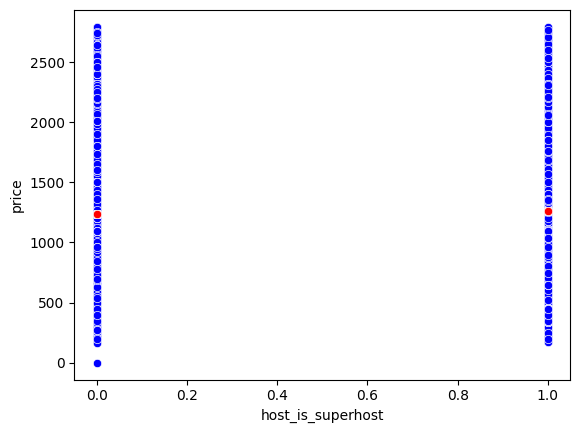

In [198]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='Prediccion_host_is_superhost', color='red', data=f2)
#sns.lineplot(x='host_is_superhost', y='Predicciones2', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

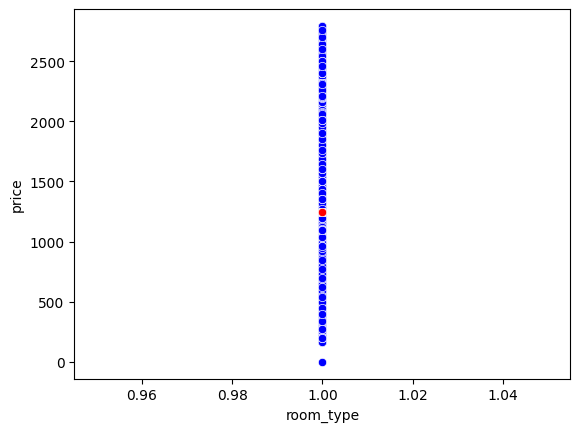

In [199]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='Prediccion_room_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_identity_verified', ylabel='price'>

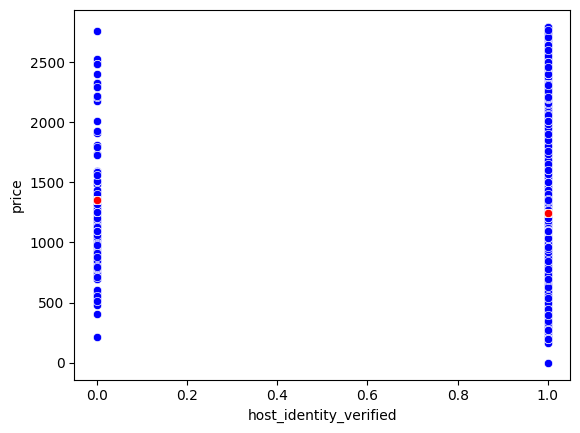

In [200]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='Prediccion_host_identity_verified', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='property_type', ylabel='price'>

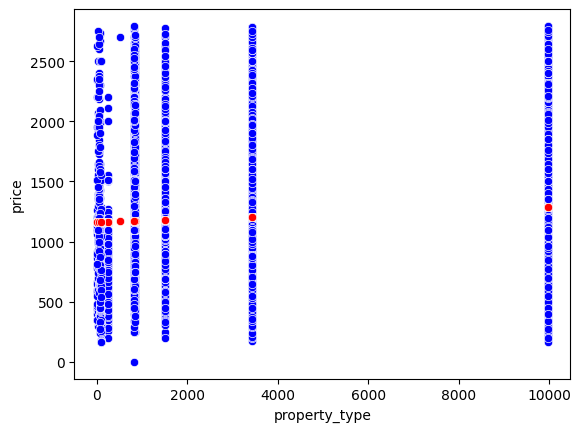

In [201]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='property_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='Prediccion_property_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='instant_bookable', ylabel='price'>

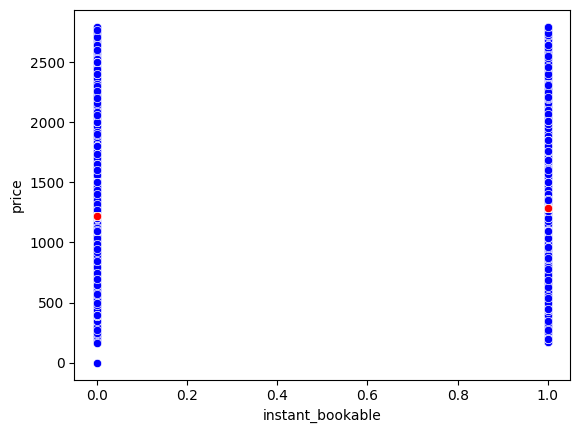

In [202]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='instant_bookable', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='Prediccion_instant_bookable', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: title={'center': 'Precio en relación a calificación de limpieza predecido'}, xlabel='review_scores_cleanliness', ylabel='price'>

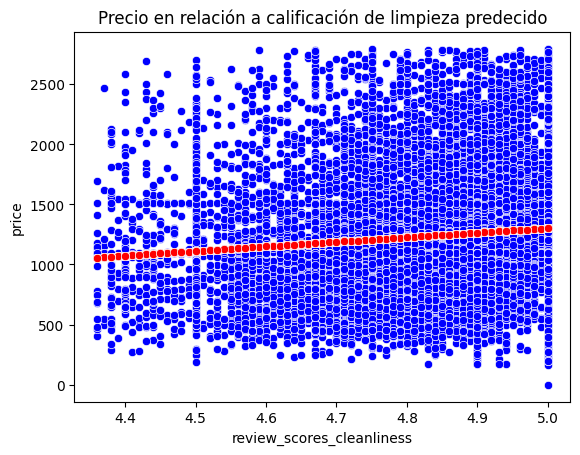

In [232]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

plt.title("Precio en relación a calificación de limpieza predecido")
sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='Prediccion_review_scores_cleanliness', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: title={'center': 'Capacidad en relación a cantidad de baños predecido'}, xlabel='bathrooms', ylabel='accommodates'>

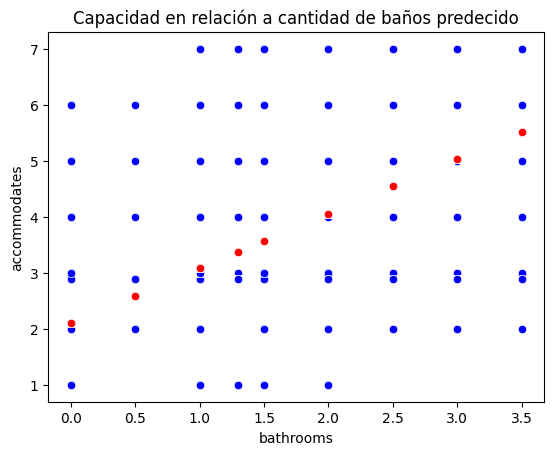

In [231]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
plt.title("Capacidad en relación a cantidad de baños predecido")
sns.scatterplot(x='bathrooms', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='Prediccion_bathrooms', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

**COEFICIENTES DE DETERMINACIÓN**

In [205]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter= model.score(X=Var_Indep, y=Var_Dep)
coef_Deter

0.003937514285830335

In [206]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2= model2.score(X=Var_Indep2, y=Var_Dep)
coef_Deter2

0.000438692181378042

In [207]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3= model3.score(X=Var_Indep3, y=Var_Dep)
coef_Deter3

0.0

In [208]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4= model4.score(X=Var_Indep4, y=Var_Dep)
coef_Deter4

0.001243324196534612

In [209]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5= model5.score(X=Var_Indep5, y=Var_Dep)
coef_Deter5

0.010730519004999772

In [210]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6= model6.score(X=Var_Indep6, y=Var_Dep)
coef_Deter6

0.00500499399092591

In [211]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7= model7.score(X=Var_Indep7, y=Var_Dep)
coef_Deter7

0.012506287448248332

In [212]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8= model8.score(X=Var_Indep8, y=Var_Dep2)
coef_Deter8

0.17467174410575603

**COEFICIENTES DE CORRELACIÓN**

In [213]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.06274961582217324)

In [214]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.02094497986100827)

In [215]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter2)
coef_Correl3

np.float64(0.02094497986100827)

In [216]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.035260802550914974)

In [217]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.1035882184661932)

In [218]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.07074598215394222)

In [219]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.11183151366340496)

In [220]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.4179374882751678)

In [221]:
#eliminamos room_type y su prediccion 

f2= f2.drop(['room_type', 'Prediccion_room_type' ], axis=1)

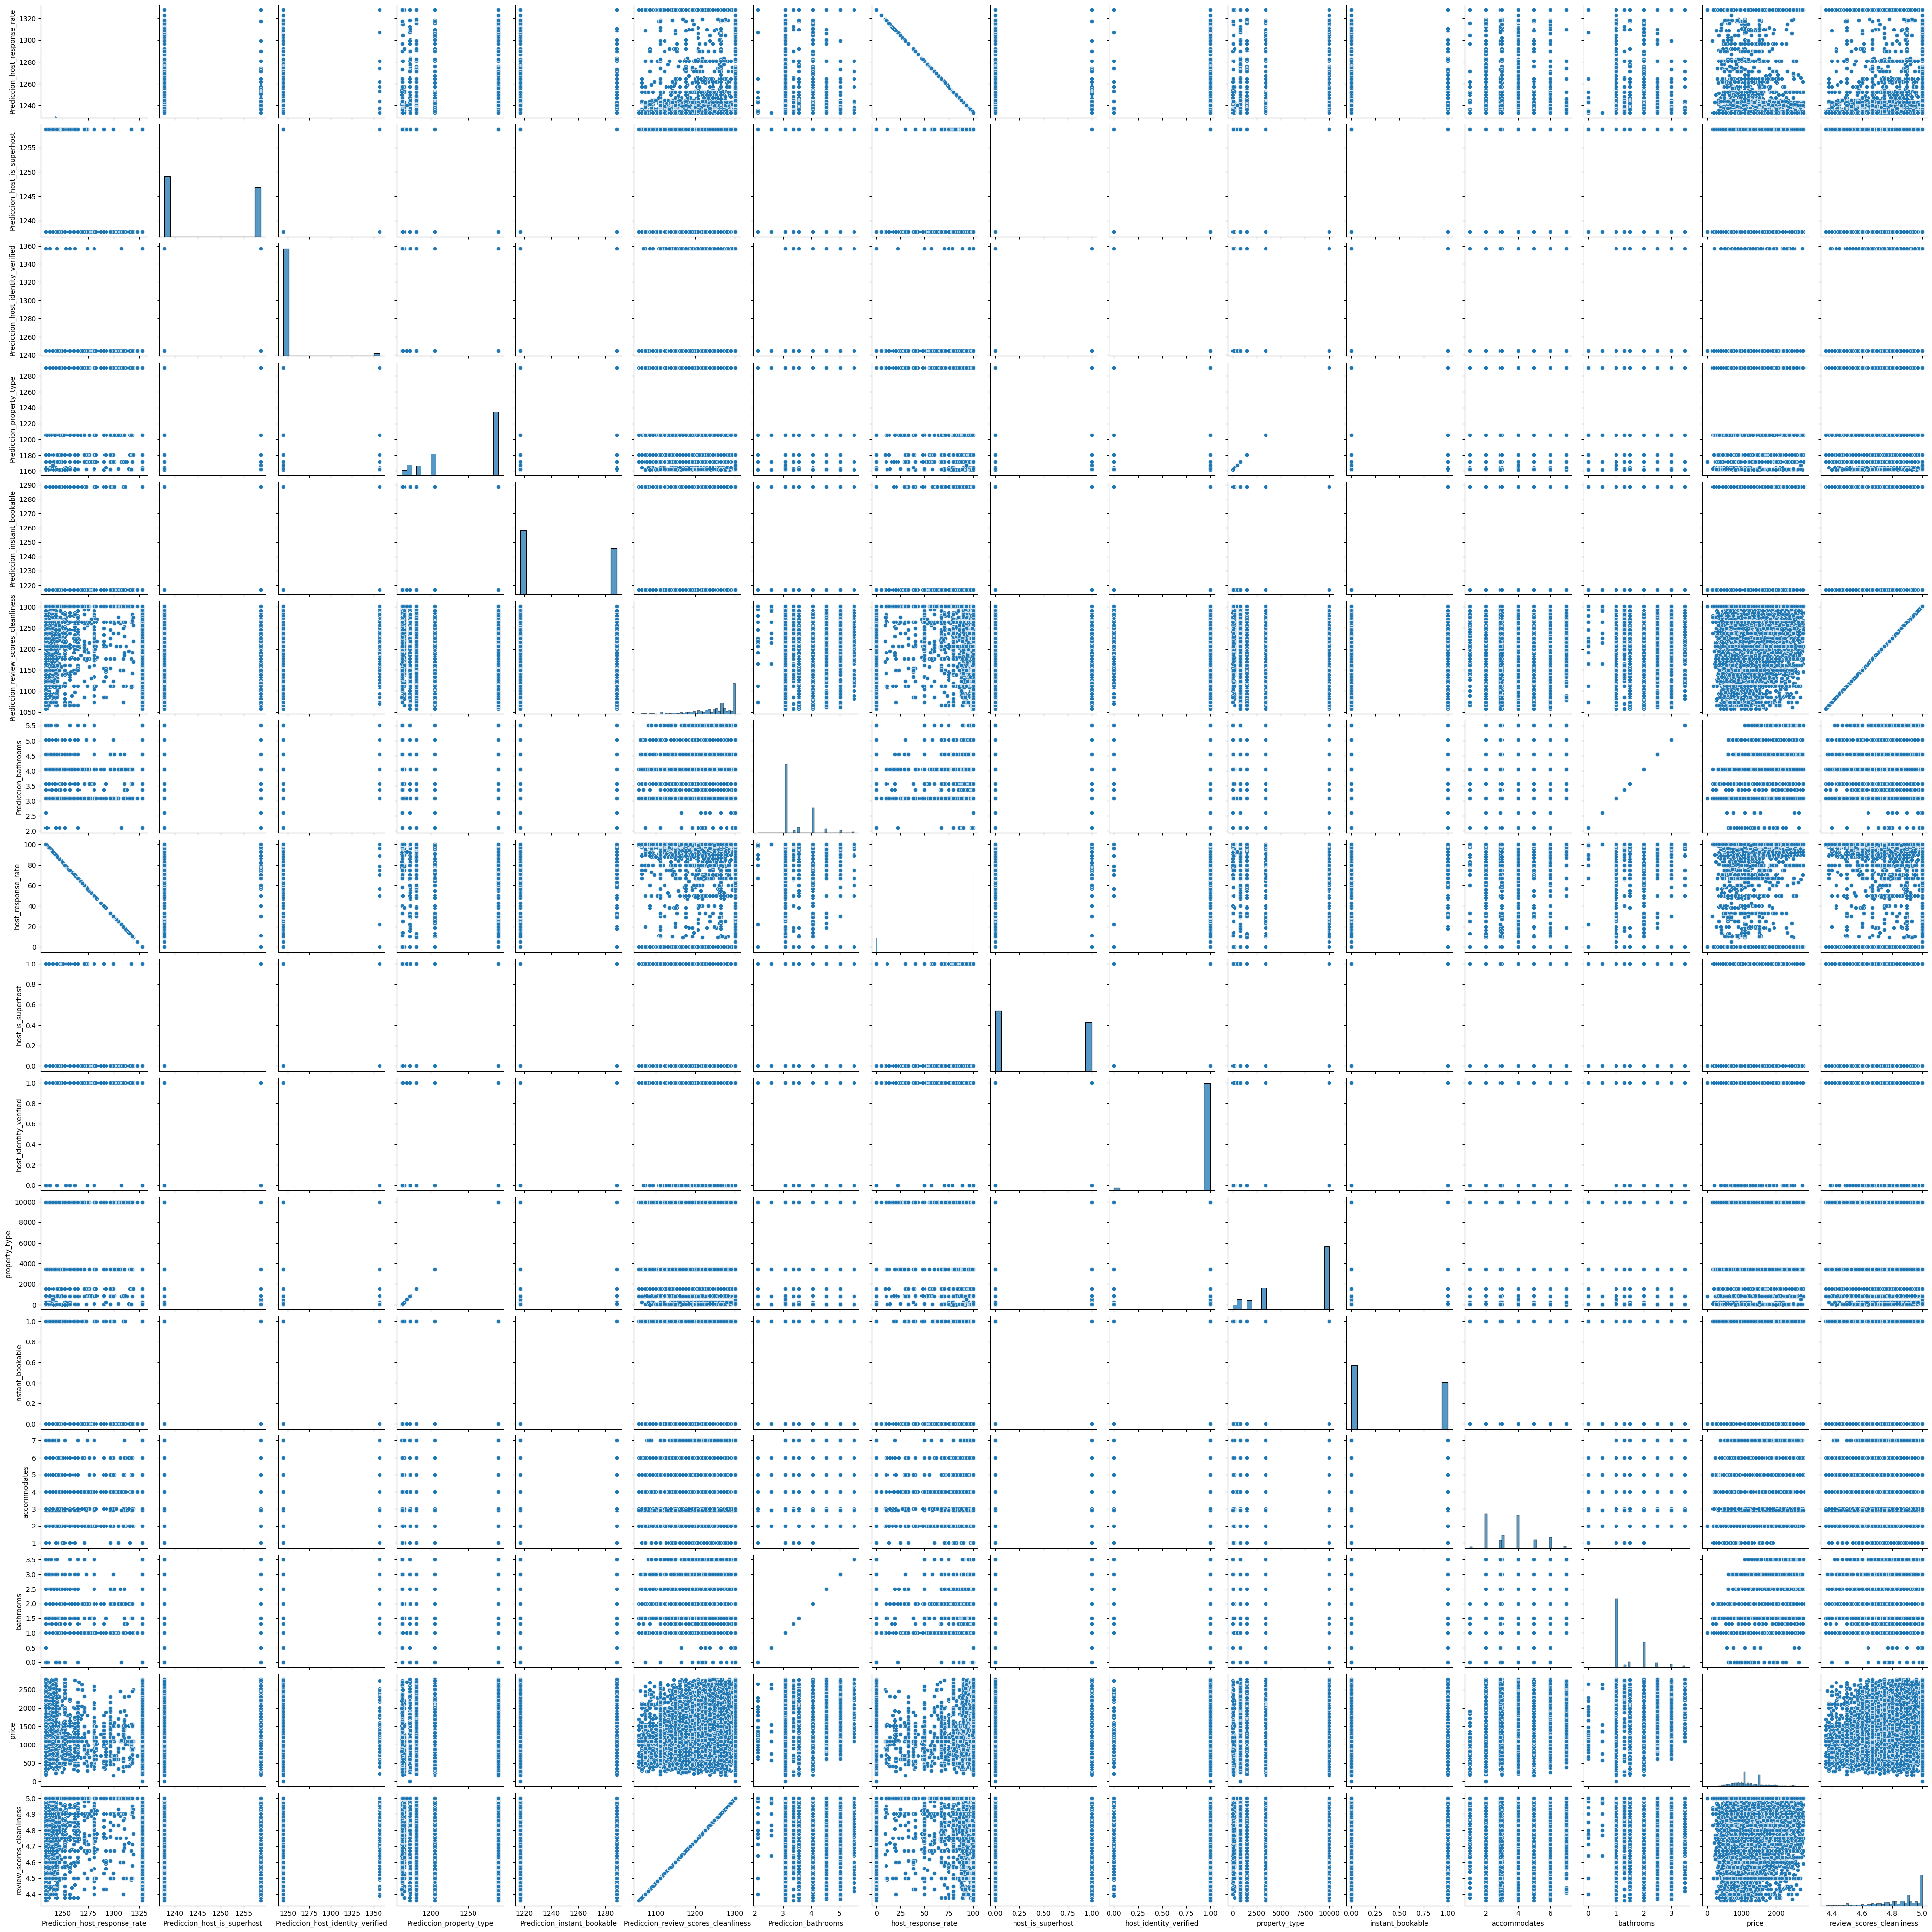

In [222]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(f2)

In [223]:
#Analizar categorias de una columna
df6 = f2.groupby(['host_response_rate'])['host_response_rate'].count()
df6

host_response_rate
0.0       2108
5.0          1
9.0          6
10.0        16
11.0         9
         ...  
96.0       100
97.0       135
98.0       171
99.0       996
100.0    12427
Name: host_response_rate, Length: 69, dtype: int64

In [224]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors= f2.corr()
Corr_Factors

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,1.000000,-0.324770,0.223050,0.011603,-0.210453,0.096525,-0.066953,-1.000000,-0.324770,-0.223050,0.011603,-0.210453,-0.027864,-0.066953,0.062750,0.096525
Prediccion_host_is_superhost,-0.324770,1.000000,-0.089277,-0.068757,0.056226,0.073298,0.063854,0.324770,1.000000,0.089277,-0.068757,0.056226,0.033998,0.063854,0.020945,0.073298
Prediccion_host_identity_verified,0.223050,-0.089277,1.000000,-0.018689,-0.069063,0.055379,-0.066730,-0.223050,-0.089277,-1.000000,-0.018689,-0.069063,-0.019736,-0.066730,0.035261,0.055379
Prediccion_property_type,0.011603,-0.068757,-0.018689,1.000000,0.088153,0.005806,0.023930,-0.011603,-0.068757,0.018689,1.000000,0.088153,0.049200,0.023930,0.103588,0.005806
Prediccion_instant_bookable,-0.210453,0.056226,-0.069063,0.088153,1.000000,-0.085209,0.013756,0.210453,0.056226,0.069063,0.088153,1.000000,-0.009797,0.013756,0.070746,-0.085209
Prediccion_review_scores_cleanliness,0.096525,0.073298,0.055379,0.005806,-0.085209,1.000000,0.022138,-0.096525,0.073298,-0.055379,0.005806,-0.085209,-0.023983,0.022138,0.111832,1.000000
Prediccion_bathrooms,-0.066953,0.063854,-0.066730,0.023930,0.013756,0.022138,1.000000,0.066953,0.063854,0.066730,0.023930,0.013756,0.417937,1.000000,0.295428,0.022138
host_response_rate,-1.000000,0.324770,-0.223050,-0.011603,0.210453,-0.096525,0.066953,1.000000,0.324770,0.223050,-0.011603,0.210453,0.027864,0.066953,-0.062750,-0.096525
host_is_superhost,-0.324770,1.000000,-0.089277,-0.068757,0.056226,0.073298,0.063854,0.324770,1.000000,0.089277,-0.068757,0.056226,0.033998,0.063854,0.020945,0.073298
host_identity_verified,-0.223050,0.089277,-1.000000,0.018689,0.069063,-0.055379,0.066730,0.223050,0.089277,1.000000,0.018689,0.069063,0.019736,0.066730,-0.035261,-0.055379


In [225]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,1.000000,0.324770,0.223050,0.011603,0.210453,0.096525,0.066953,1.000000,0.324770,0.223050,0.011603,0.210453,0.027864,0.066953,0.062750,0.096525
Prediccion_host_is_superhost,0.324770,1.000000,0.089277,0.068757,0.056226,0.073298,0.063854,0.324770,1.000000,0.089277,0.068757,0.056226,0.033998,0.063854,0.020945,0.073298
Prediccion_host_identity_verified,0.223050,0.089277,1.000000,0.018689,0.069063,0.055379,0.066730,0.223050,0.089277,1.000000,0.018689,0.069063,0.019736,0.066730,0.035261,0.055379
Prediccion_property_type,0.011603,0.068757,0.018689,1.000000,0.088153,0.005806,0.023930,0.011603,0.068757,0.018689,1.000000,0.088153,0.049200,0.023930,0.103588,0.005806
Prediccion_instant_bookable,0.210453,0.056226,0.069063,0.088153,1.000000,0.085209,0.013756,0.210453,0.056226,0.069063,0.088153,1.000000,0.009797,0.013756,0.070746,0.085209
Prediccion_review_scores_cleanliness,0.096525,0.073298,0.055379,0.005806,0.085209,1.000000,0.022138,0.096525,0.073298,0.055379,0.005806,0.085209,0.023983,0.022138,0.111832,1.000000
Prediccion_bathrooms,0.066953,0.063854,0.066730,0.023930,0.013756,0.022138,1.000000,0.066953,0.063854,0.066730,0.023930,0.013756,0.417937,1.000000,0.295428,0.022138
host_response_rate,1.000000,0.324770,0.223050,0.011603,0.210453,0.096525,0.066953,1.000000,0.324770,0.223050,0.011603,0.210453,0.027864,0.066953,0.062750,0.096525
host_is_superhost,0.324770,1.000000,0.089277,0.068757,0.056226,0.073298,0.063854,0.324770,1.000000,0.089277,0.068757,0.056226,0.033998,0.063854,0.020945,0.073298
host_identity_verified,0.223050,0.089277,1.000000,0.018689,0.069063,0.055379,0.066730,0.223050,0.089277,1.000000,0.018689,0.069063,0.019736,0.066730,0.035261,0.055379


<Axes: >

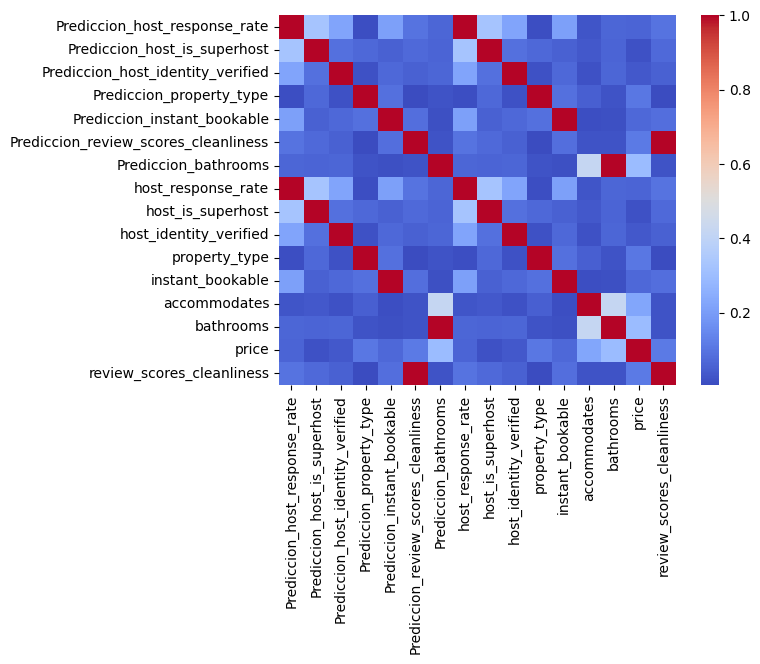

In [226]:
#Graficamos el mapa de calor de las coeficientes de correlación 
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'coolwarm')
Heart_Nap

<Axes: >

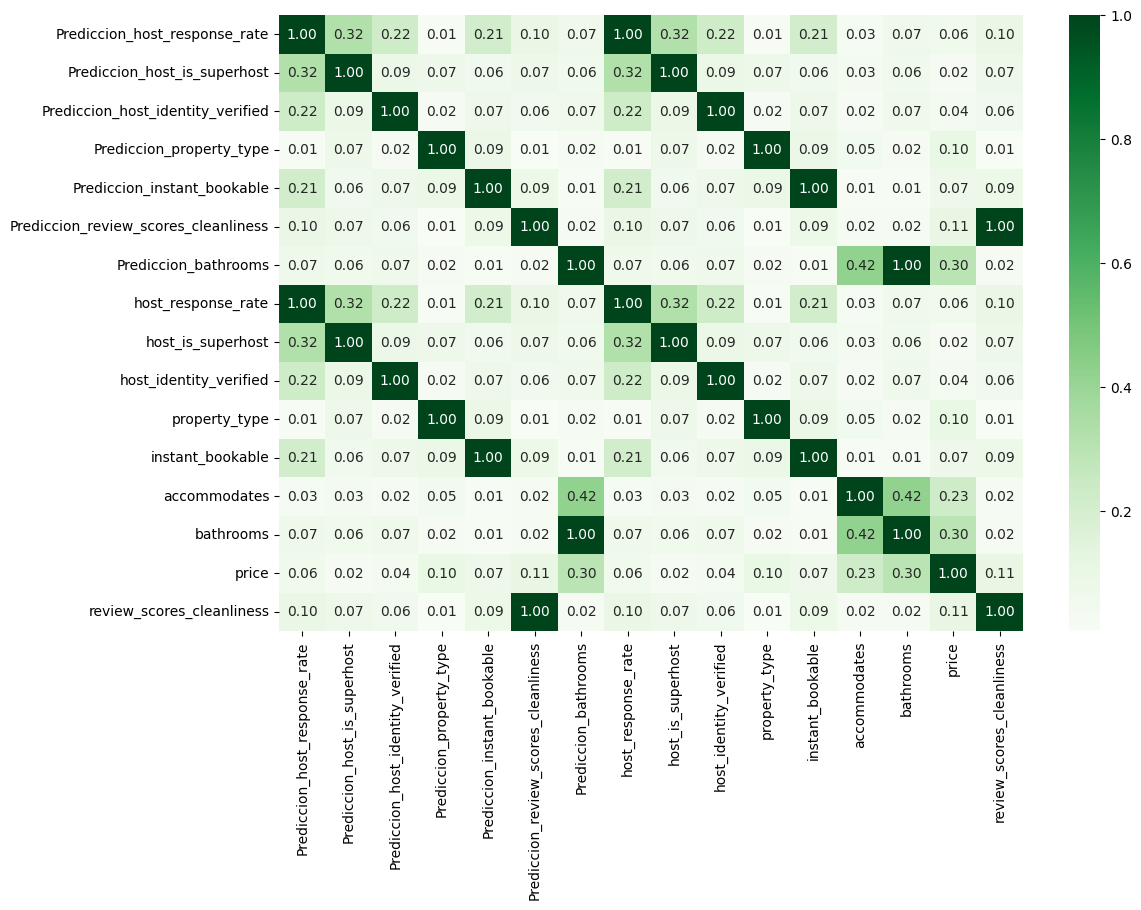

In [234]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Greens', annot=True, fmt=".2f")
Heart_Nap

In [228]:
# Obtener R² de cada modelo
r2_1 = model.score(Var_Indep, Var_Dep)
r2_2 = model2.score(Var_Indep2, Var_Dep)
r2_3 = model3.score(Var_Indep3, Var_Dep)
r2_4 = model4.score(Var_Indep4, Var_Dep)
r2_5 = model5.score(Var_Indep5, Var_Dep)
r2_6 = model6.score(Var_Indep6, Var_Dep)
r2_7 = model7.score(Var_Indep7, Var_Dep)
r2_8 = model8.score(Var_Indep8, Var_Dep2)

# Guardar los resultados en un diccionario
r2_values = {
    "host_response_rate": r2_1,
    "host_is_superhost": r2_2,
    "room_type": r2_3,
    "host_identity_verified": r2_4,
    "property_type": r2_5,
    "instant_bookable": r2_6,
    "review_scores_cleanliness": r2_7,
    "bathrooms": r2_8
}

# Ordenar y mostrar las 3 mejores variables
top_3 = sorted(r2_values.items(), key=lambda x: x[1], reverse=True)[:3]
print("Las 3 variables con mayor correlación son:")
for variable, r2 in top_3:
    print(f"{variable}: R² = {r2:.4f}")

Las 3 variables con mayor correlación son:
bathrooms: R² = 0.1747
review_scores_cleanliness: R² = 0.0125
property_type: R² = 0.0107


In [ ]:
Corr_Factors1.to_csv('Coeficientes de correlación entire méxico.csv')